In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#import dependencies
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

#import pydot
#import graphviz
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

F:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1415 - val_acc: 0.9574
Epoch 2/10
 - 10s - loss: 0.1116 - acc: 0.9675 - val_loss: 0.0926 - val_acc: 0.9707
Epoch 3/10
 - 9s - loss: 0.0717 - acc: 0.9796 - val_loss: 0.0785 - val_acc: 0.9769
Epoch 4/10
 - 10s - loss: 0.0505 - acc: 0.9857 - val_loss: 0.0748 - val_acc: 0.9774
Epoch 5/10
 - 12s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0672 - val_acc: 0.9786
Epoch 6/10
 - 10s - loss: 0.0269 - acc: 0.9925 - val_loss: 0.0628 - val_acc: 0.9809
Epoch 7/10
 - 9s - loss: 0.0211 - acc: 0.9946 - val_loss: 0.0611 - val_acc: 0.9817
Epoch 8/10
 - 9s - loss: 0.0139 - acc: 0.9970 - val_loss: 0.0617 - val_acc: 0.9797
Epoch 9/10
 - 10s - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0591 - val_acc: 0.9805
Epoch 10/10
 - 9s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0589 - val_acc: 0.9816
Baseline Error: 1.84%


Variance PCA: 0.5760679592795994
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.315077
[t-SNE] Error after 375 iterations: 1.315077


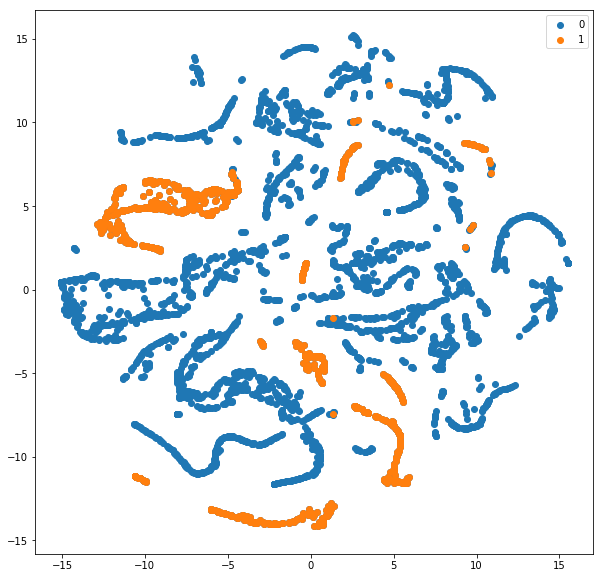

In [ ]:
from keras.utils import np_utils

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

hidden_features = model.predict(X_test)

pca = PCA(n_components=5)

pca_result = pca.fit_transform(hidden_features)

print('Variance PCA: {}'.format(numpy.sum(pca.explained_variance_ratio_)))

##Variance PCA: 0.993621154832802



#Run T-SNE on the PCA features.

tsne = TSNE(n_components=2, verbose = 1)

tsne_results = tsne.fit_transform(pca_result[:5000])

y_test_cat = np_utils.to_categorical(y_test[:5000], num_classes = 2)

color_map = numpy.argmax(y_test_cat, axis=1)

plt.figure(figsize=(10,10))

for cl in range(2):

    indices = numpy.where(color_map==cl)

    indices = indices[0]

    plt.scatter(tsne_results[indices,0], tsne_results[indices, 1], label=cl)

plt.legend()

plt.show()

In [ ]:
#train/test split and cross validation

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = baseline_model, epochs=10, batch_size = 100, verbose=0)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_test, y_test, cv=10)
print(results.mean())

(48000, 784) (48000, 10)
(12000, 784) (12000, 10)
